<a href="https://colab.research.google.com/github/111DataScienceWizard/TREBIRTH/blob/main/Collab%20Notes/Copy_of_kymatio_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kymatio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.6/87.6 kB 2.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
import kymatio
from kymatio import Scattering1D
from sklearn.preprocessing import normalize
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from kymatio.numpy import Scattering1D

In [ ]:
TrainingData = pd.read_csv("/content/Training_Data.csv")
TestData = pd.read_csv("/content/Testing_Data.csv")

In [ ]:
TrainingDataNorm = normalize(TrainingData.values, axis=0)
TestDataNorm = normalize(TestData.values, axis=0)

In [ ]:
TrainingDataNorm_T = TrainingDataNorm.T
TestDataNorm_T = TestDataNorm.T

In [ ]:
TrainingDataNorm_T.shape

(98, 1842)

In [ ]:
J = 4
Q = 12

In [ ]:
T = TrainingDataNorm_T.shape[1]

scattering = Scattering1D(J, T, Q)

In [ ]:
Test = TestDataNorm_T.shape[1]

scatteringTest = Scattering1D(J, Test, Q)

In [ ]:
sTrain = scattering(TrainingDataNorm_T)
sTest = scatteringTest(TestDataNorm_T)

In [ ]:
sTrain_log = np.log(np.abs(sTrain) + 1e-10)  # Adding small constant to avoid log(0)
sTest_log = np.log(np.abs(sTest) + 1e-10)

In [ ]:
TrainFeatures = np.mean(sTrain_log, axis=-1)
TestFeatures = np.mean(sTest_log, axis=-1)

In [ ]:
TrainLabels = np.repeat(['Healthy_Radar', 'Inf_Radar'], [49, 49])
TestLabels = np.repeat(['Healthy_Radar', 'Inf_Radar'], [10, 10])

In [ ]:
svm = SVC(kernel='poly', degree=2, C=1, decision_function_shape='ovo')
svm.fit(TrainFeatures, TrainLabels)

SVC(C=1, decision_function_shape='ovo', degree=2, kernel='poly')

In [ ]:
predLabels = svm.predict(TestFeatures)

In [ ]:
accuracy = accuracy_score(TestLabels, predLabels)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
results = pd.DataFrame({'TrueLabel': TestLabels[:20], 'PredictedLabel': predLabels[:20]})
print(results)

        TrueLabel PredictedLabel
0   Healthy_Radar  Healthy_Radar
1   Healthy_Radar  Healthy_Radar
2   Healthy_Radar  Healthy_Radar
3   Healthy_Radar  Healthy_Radar
4   Healthy_Radar  Healthy_Radar
5   Healthy_Radar  Healthy_Radar
6   Healthy_Radar  Healthy_Radar
7   Healthy_Radar  Healthy_Radar
8   Healthy_Radar  Healthy_Radar
9   Healthy_Radar  Healthy_Radar
10      Inf_Radar      Inf_Radar
11      Inf_Radar      Inf_Radar
12      Inf_Radar      Inf_Radar
13      Inf_Radar      Inf_Radar
14      Inf_Radar      Inf_Radar
15      Inf_Radar      Inf_Radar
16      Inf_Radar      Inf_Radar
17      Inf_Radar      Inf_Radar
18      Inf_Radar      Inf_Radar
19      Inf_Radar      Inf_Radar


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [ ]:
cm = confusion_matrix(TestLabels, predLabels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[10  0]
 [ 0 10]]


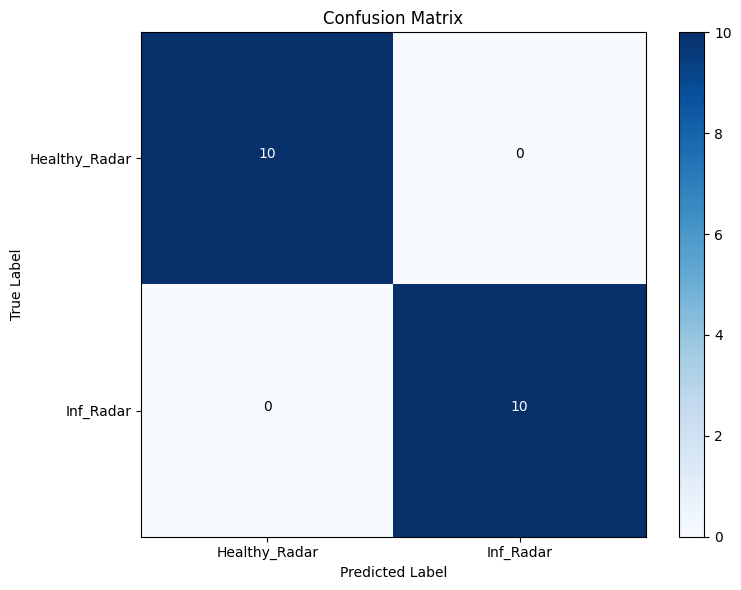

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0, 1], ['Healthy_Radar', 'Inf_Radar'])
plt.yticks([0, 1], ['Healthy_Radar', 'Inf_Radar'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.tight_layout()
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve((TestLabels == 'Inf_Radar').astype(int), (predLabels == 'Inf_Radar').astype(int))
roc_auc = auc(fpr, tpr)

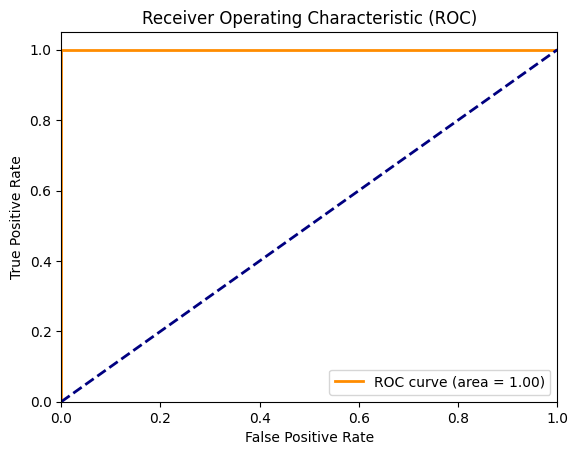

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

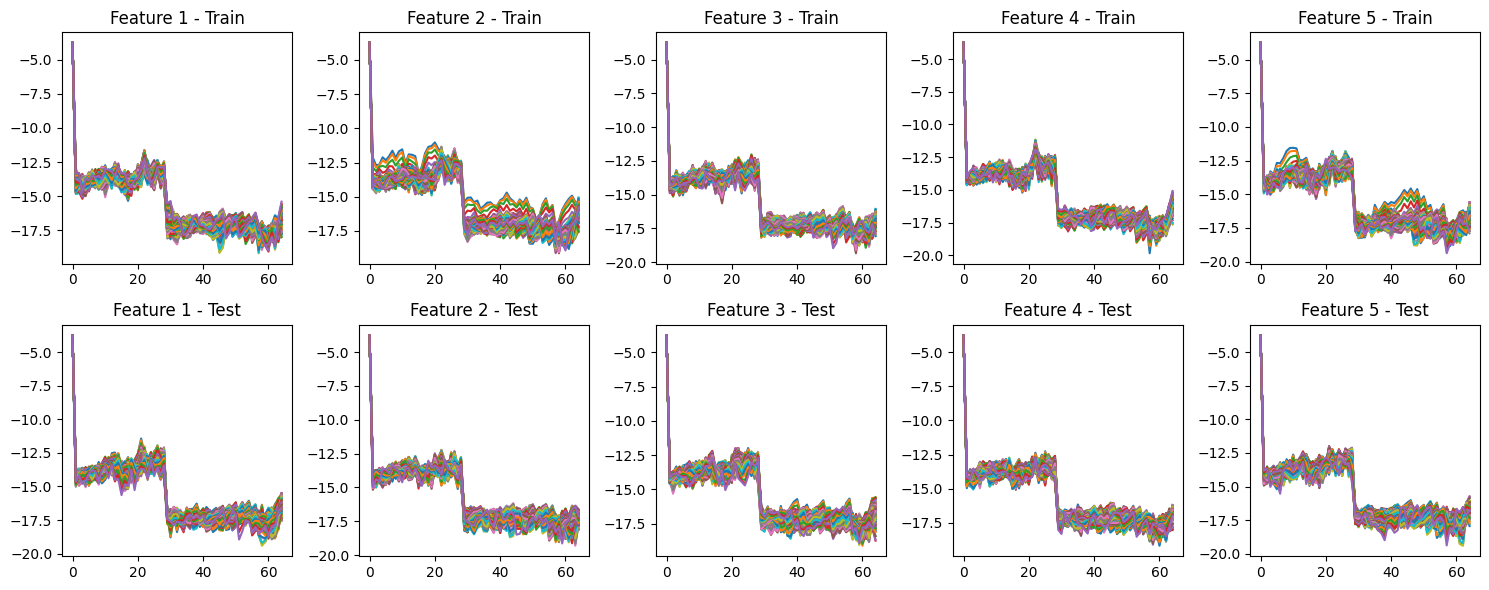

In [ ]:
import matplotlib.pyplot as plt

# Visualize some of the features
num_features_to_visualize = 5

# Plot some of the features
plt.figure(figsize=(15, 6))
for i in range(num_features_to_visualize):
    plt.subplot(2, num_features_to_visualize, i + 1)
    plt.plot(sTrain_log[i])
    plt.title(f'Feature {i+1} - Train')
    plt.subplot(2, num_features_to_visualize, i + 1 + num_features_to_visualize)
    plt.plot(sTest_log[i])
    plt.title(f'Feature {i+1} - Test')
plt.tight_layout()
plt.show()


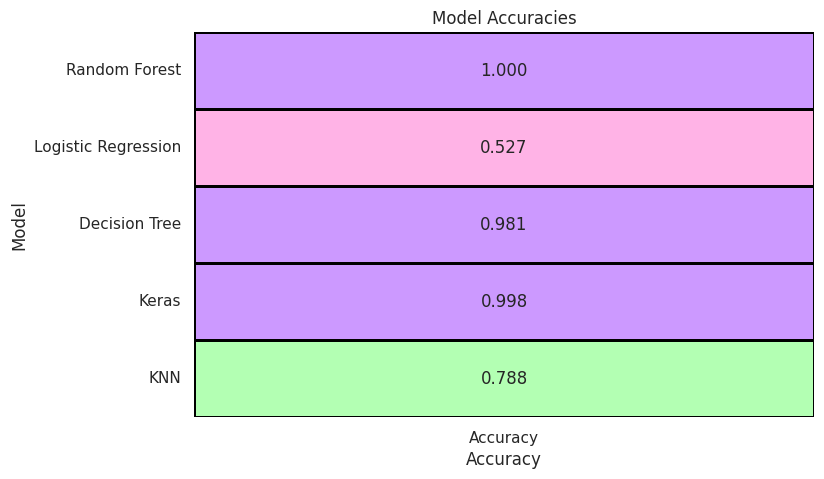

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the data
data = {'Model': ['Random Forest', 'Logistic Regression', 'Decision Tree', 'Keras', 'KNN'],
        'Accuracy': [1.0, 0.527, 0.981, 0.998, 0.788]}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the style
sns.set(style="whitegrid")

# Define custom color palette
palette = sns.color_palette(['#ffb3e6', '#ffff99', '#b3ffb3', '#ffb6c1', '#cc99ff'])

# Plot the table
plt.figure(figsize=(8, 5))
ax = sns.heatmap(df.set_index('Model'), annot=True, cmap=palette, fmt=".3f", cbar=False, linewidths=1, linecolor='black')

# Set plot title and labels
plt.title('Model Accuracies')
plt.xlabel('Accuracy')

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Show the plot
plt.show()


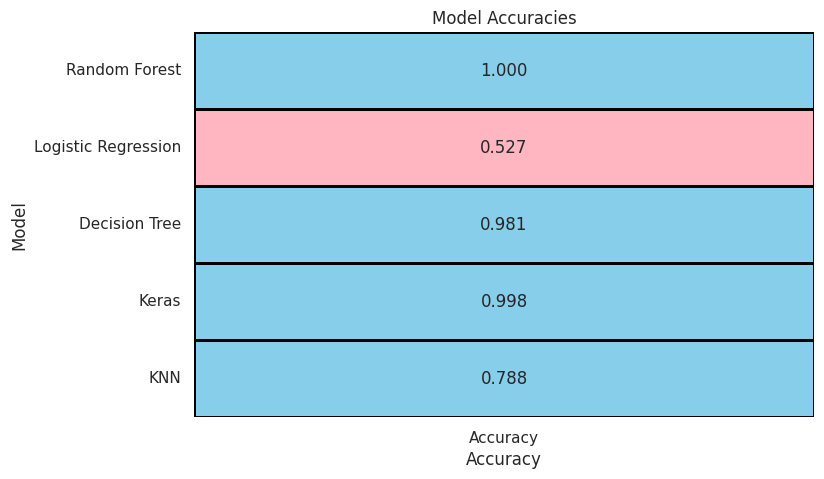

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the data
data = {'Model': ['Random Forest', 'Logistic Regression', 'Decision Tree', 'Keras', 'KNN'],
        'Accuracy': [1.0, 0.527, 0.981, 0.998, 0.788]}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the style
sns.set(style="whitegrid")

# Define custom color palette
palette = sns.color_palette(['#ffb6c1', '#87ceeb'])

# Plot the table
plt.figure(figsize=(8, 5))
ax = sns.heatmap(df.set_index('Model'), annot=True, cmap=palette, fmt=".3f", cbar=False, linewidths=1, linecolor='black')

# Set plot title and labels
plt.title('Model Accuracies')
plt.xlabel('Accuracy')

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Show the plot
plt.show()


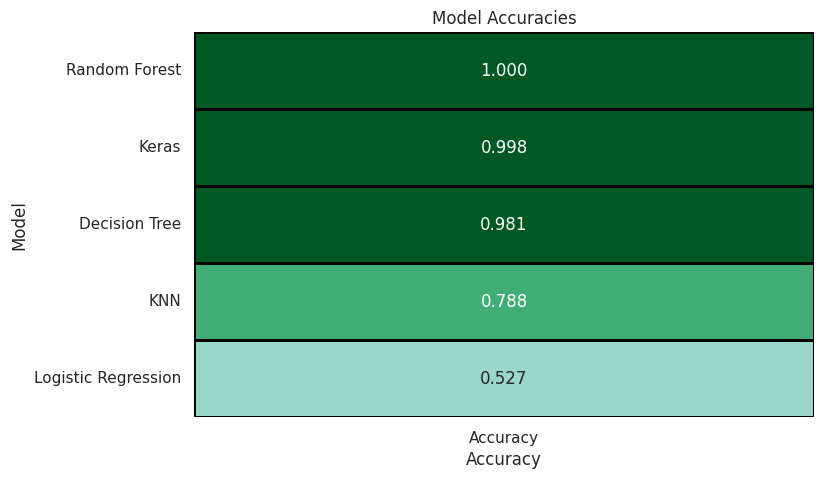

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the data
data = {'Model': ['Random Forest', 'Keras', 'KNN', 'Decision Tree', 'Logistic Regression'],
        'Accuracy': [1.0, 0.998, 0.788, 0.981, 0.527]}

# Create a DataFrame
df = pd.DataFrame(data)

# Sort DataFrame by accuracy in descending order
df = df.sort_values(by='Accuracy', ascending=False)

# Set the style
sns.set(style="whitegrid")

# Define custom color palette with different cool shades
palette = sns.color_palette(['#99d8c9', '#66c2a4', '#41ae76', '#238b45', '#005824'])

# Plot the table
plt.figure(figsize=(8, 5))
ax = sns.heatmap(df.set_index('Model'), annot=True, cmap=palette, fmt=".3f", cbar=False, linewidths=1, linecolor='black')

# Set plot title and labels
plt.title('Model Accuracies')
plt.xlabel('Accuracy')

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Show the plot
plt.show()


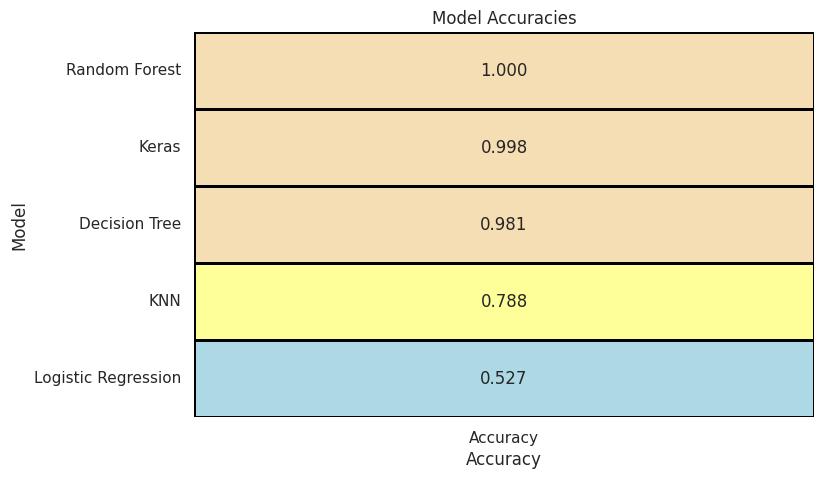

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the data
data = {'Model': ['Random Forest', 'Decision Tree', 'Keras', 'KNN', 'Logistic Regression'],
        'Accuracy': [1.0, 0.981, 0.998, 0.788, 0.527]}

# Create a DataFrame
df = pd.DataFrame(data)

# Sort DataFrame by accuracy in descending order
df = df.sort_values(by='Accuracy', ascending=False)

# Set the style
sns.set(style="whitegrid")

# Define custom color palette with different cool shades
palette = sns.color_palette(['#add8e6', '#ffb6c1', '#ffff99', '#90ee90', '#f5deb3'])

# Plot the table
plt.figure(figsize=(8, 5))
ax = sns.heatmap(df.set_index('Model'), annot=True, cmap=palette, fmt=".3f", cbar=False, linewidths=1, linecolor='black')

# Set plot title and labels
plt.title('Model Accuracies')
plt.xlabel('Accuracy')

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Show the plot
plt.show()
